In [2]:
import numpy as np
from core.v1.nn2 import Node
from test.network.custom_network import CustomNetwork
from utils.draw_utils import draw_dot

=== 方法1：自制自动微分引擎 ===
=== 网络权重 ===
隐藏层:
  h1 (sigmoid): w1=0.1500, w2=0.2000, b1=0.3500
  h2 (sigmoid): w3=0.2500, w4=0.3000, b2=0.6000
输出层:
  o1 (sigmoid): w5=0.4000, w6=0.4500
  o2 (sigmoid): w7=0.5000, w8=0.5500

输入: [0.05 0.1 ]
目标输出: [0.01 0.99]
初始预测: [0.6300, 0.6586]

=== 开始训练 (学习率: 0.5, 轮数: 10) ===
Epoch     0: Loss = 0.247111, Output = [0.6300, 0.6586]
Epoch     9: Loss = 0.099160, Output = [0.3885, 0.7554]

=== 训练完成 ===
=== 网络权重 ===
隐藏层:
  h1 (sigmoid): w1=0.1502, w2=0.2005, b1=0.3549
  h2 (sigmoid): w3=0.2502, w4=0.3004, b2=0.6038
输出层:
  o1 (sigmoid): w5=0.0452, w6=0.0581
  o2 (sigmoid): w7=0.6692, w8=0.7369

最终预测: [0.3697, 0.7626]
目标输出: [0.0100, 0.9900]
误差: [0.3597, 0.2274]

损失变化: 0.247111 -> 0.099160
[Node(data=0.15024489297285268, grad=-0.00026522491008822515), Node(data=0.2004897859457054, grad=-0.0005304498201764503), Node(data=0.35489785945705365, grad=-0.005304498201764503), Node(data=0.2501907684473495, grad=-0.00026483224118645894), Node(data=0.30038153689469893, grad=

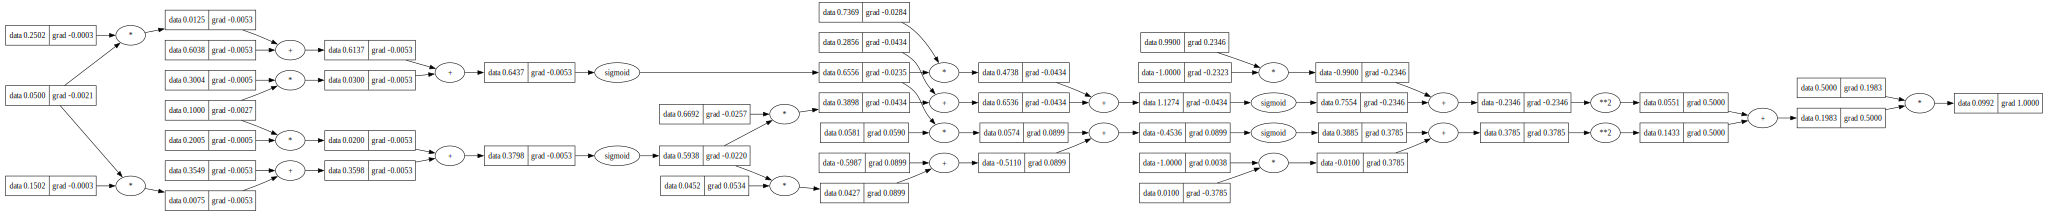

In [3]:
print("=== 方法1：自制自动微分引擎 ===")

# 创建网络：2输入 -> 8隐藏 -> 8隐藏 -> 1输出
# 创建自定义网络
# 创建自定义网络
net = CustomNetwork()
net.print_weights()

# 输入数据
X_train = np.array([[0.05, 0.10]])
y_train = np.array([[0.01, 0.99]])

print(f"\n输入: {X_train[0]}")
print(f"目标输出: {y_train[0]}")

# 测试前向传播
x_input = [Node(X_train[0][0]), Node(X_train[0][1])]
output = net(x_input)
print(f"初始预测: [{output[0].data:.4f}, {output[1].data:.4f}]")

# 训练参数
learning_rate = 0.5
epochs = 10

print(f"\n=== 开始训练 (学习率: {learning_rate}, 轮数: {epochs}) ===")

losses = []
for epoch in range(epochs):
    # 转换输入为Node对象
    inputs = [Node(X_train[0][0]), Node(X_train[0][1])]
    targets = [Node(y_train[0][0]), Node(y_train[0][1])]

    # 前向传播
    outputs = net(inputs)

    # 计算损失 (MSE)
    loss1 = (outputs[0] - targets[0]) ** 2
    loss2 = (outputs[1] - targets[1]) ** 2
    total_loss = (loss1 + loss2) * 0.5  # 总损失的一半

    losses.append(total_loss.data)

    # 反向传播
    net.zero_grad()
    total_loss.backward()

    # 参数更新
    for param in net.parameters():
        param.data -= learning_rate * param.grad

    # 打印训练进度
    if epoch % 2000 == 0 or epoch == epochs - 1:
        print(
            f"Epoch {epoch:5d}: Loss = {total_loss.data:.6f}, Output = [{outputs[0].data:.4f}, {outputs[1].data:.4f}]")

print("\n=== 训练完成 ===")
net.print_weights()

# 最终测试
inputs_test = [Node(0.05), Node(0.10)]
final_outputs = net(inputs_test)
print(f"\n最终预测: [{final_outputs[0].data:.4f}, {final_outputs[1].data:.4f}]")
print(f"目标输出: [0.0100, 0.9900]")
print(f"误差: [{abs(final_outputs[0].data - 0.01):.4f}, {abs(final_outputs[1].data - 0.99):.4f}]")

print(f"\n损失变化: {losses[0]:.6f} -> {losses[-1]:.6f}")

print(net.parameters())
print("自制引擎训练完成!")

dot =  draw_dot(total_loss)
dot